In [1]:
from dpks.quant_matrix import QuantMatrix

import pandas as pd
import numpy as np

In [2]:
design_matrix = pd.read_csv(
    "../tests/input_files/design_sepsis.tsv",
    #"/home/aaron/projects/dpks/notebooks/ml_api/covid_design_matrix.tsv",
    sep="\t"
)

In [3]:
design_matrix = design_matrix.sort_values("group", ascending=False).reset_index(drop=True)

In [4]:
#design_matrix['sample_num'] = design_matrix.index.values

Now, we simulate 3 groups in the data so we can perform multiple rounds of explanations

In [5]:
# design_matrix['group'] = np.where(
#     design_matrix['sample_num'] < 50, 3, design_matrix['group']
# )

In [6]:
design_matrix['group'].value_counts()

group
2    123
1     74
Name: count, dtype: int64

In [7]:
qm = QuantMatrix(
    quantification_file="../tests/input_files/data_sepsis.tsv",
    design_matrix_file=design_matrix
).filter().normalize(
        method="mean",
        use_rt_sliding_window_filter=True,
        rt_unit="second",
        stride=5,
        minimum_data_points=200,
    ).quantify(method="maxlfq", top_n=5).impute(method="neighborhood")

/home/aaron/miniconda3/envs/dpks0.1.5/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/aaron/projects/dpks/dpks/dpks/quantification.py:275: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  grouping = mask_group(groupings[group_idx])


In [8]:
qm.to_df()

,Protein,TM_P1911_190,TM_P1912_030,TM_P1912_032,TM_P1912_033,TM_P1912_034,TM_M2012_102,TM_M2012_103,TM_M2012_104,TM_M2012_106,...,TM_M2012_143,TM_M2012_127,TM_M2012_142,TM_M2012_141,TM_M2012_140,TM_M2012_138,TM_M2012_046,TM_M2012_129,TM_M2012_128,TM_M2012_041
0,P08603,24.717230,25.494552,25.141237,25.540496,24.994147,26.092043,25.672870,25.430867,25.514954,...,25.210260,25.984396,26.114732,26.122828,26.209846,26.366222,25.477740,25.747256,25.898304,25.187179
1,P02671,30.034496,28.918791,29.690906,29.121366,28.902594,27.879669,29.483051,29.911103,29.237469,...,28.064970,29.967291,28.544386,28.316590,28.004205,28.561058,29.940752,29.552427,29.593817,29.688738
2,P01042,24.481048,25.266077,24.421696,24.983738,25.214760,25.979751,25.761774,25.531679,25.605163,...,25.252370,25.945718,26.008844,26.517554,26.186563,26.208556,25.745831,25.590381,25.709089,24.962298
3,P00450,26.061303,26.612764,26.140733,26.656094,26.744928,26.456966,26.593541,26.501464,26.620184,...,25.137898,26.358820,26.201240,26.192226,25.467209,26.076142,26.793905,25.879276,26.211713,26.671304
4,P05156,23.014848,21.919844,23.398637,22.557890,22.607112,21.639420,21.801436,21.523716,22.133912,...,21.505591,23.642180,22.138601,22.583829,22.565007,23.200379,23.396516,23.209370,23.334877,22.487851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,P07333,19.759348,20.422480,19.659375,20.489971,20.294608,19.679646,19.873758,19.554750,19.405891,...,19.425559,18.920279,19.997434,18.548479,19.805635,19.404250,18.573160,18.893584,19.013321,18.037868
550,Q06323,18.681479,18.118377,18.497750,18.918493,18.401925,19.146209,18.391366,17.477954,18.067339,...,18.997520,18.072808,19.264701,18.530119,18.928317,19.837256,17.656086,17.866512,18.346884,17.651603
551,P16035,18.432887,18.516401,19.119242,18.687431,18.983767,18.320305,17.798199,18.588628,18.349684,...,19.383494,18.374109,18.270185,18.423804,19.477035,17.711620,19.744360,17.705238,17.456515,17.911868
552,O95633,17.707762,18.127397,17.755561,18.034071,17.624851,18.470644,17.704543,17.894956,17.453883,...,19.062819,16.623635,20.326704,20.444891,19.592011,19.881807,17.884090,18.095404,16.797726,17.481988


In [9]:
qm_decoys_added = qm.append(
    method="shuffle",
    feature_column="Protein"
)

In [10]:
qm_decoys_added.sample_annotations

,sample,group
sample,,
TM_P1911_190,TM_P1911_190,2
TM_P1912_030,TM_P1912_030,2
TM_P1912_032,TM_P1912_032,2
TM_P1912_033,TM_P1912_033,2
TM_P1912_034,TM_P1912_034,2
...,...,...
TM_M2012_138,TM_M2012_138,1
TM_M2012_046,TM_M2012_046,1
TM_M2012_129,TM_M2012_129,1


In [11]:
qm_decoys_added = qm_decoys_added.compare(
    method="linregress",
    min_samples_per_group=2,
    comparisons=[(2, 1)]
)

In [12]:
qm_decoys_added.row_annotations

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1
0,P08603,0,0.018481,25.702930,25.733270,0.397006,0.432812,-0.030340,0.618039,123,74,0.574474,0.240730
1,P02671,0,0.037551,29.490347,29.424444,0.615070,0.795177,0.065902,0.518053,123,74,0.529300,0.276298
2,P01042,0,0.023464,25.622400,25.583334,0.435524,0.484683,0.039066,0.561823,123,74,0.548266,0.261009
3,P00450,0,0.069428,26.835505,26.728021,0.426089,0.511117,0.107484,0.115588,123,74,0.202033,0.694578
4,P05156,0,0.074842,23.281418,23.157433,0.631588,0.494956,0.123985,0.152697,123,74,0.246254,0.608617
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,decoy_P07333,1,0.013394,19.332377,19.308489,0.714906,0.740345,0.023888,0.823805,123,74,0.664623,0.177425
1104,decoy_Q06323,1,0.062462,18.301635,18.407716,0.643692,0.579719,-0.106081,0.248984,123,74,0.345811,0.461161
1105,decoy_P16035,1,0.079668,18.396142,18.532025,0.701996,0.637893,-0.135883,0.177270,123,74,0.274837,0.560924
1106,decoy_O95633,1,0.089920,17.470955,17.313528,0.856852,0.775616,0.157428,0.199647,123,74,0.302496,0.519281


In [13]:
data = qm_decoys_added.row_annotations[~qm_decoys_added.row_annotations['CorrectedPValue2-1'].isna()]

In [14]:
data

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1
0,P08603,0,0.018481,25.702930,25.733270,0.397006,0.432812,-0.030340,0.618039,123,74,0.574474,0.240730
1,P02671,0,0.037551,29.490347,29.424444,0.615070,0.795177,0.065902,0.518053,123,74,0.529300,0.276298
2,P01042,0,0.023464,25.622400,25.583334,0.435524,0.484683,0.039066,0.561823,123,74,0.548266,0.261009
3,P00450,0,0.069428,26.835505,26.728021,0.426089,0.511117,0.107484,0.115588,123,74,0.202033,0.694578
4,P05156,0,0.074842,23.281418,23.157433,0.631588,0.494956,0.123985,0.152697,123,74,0.246254,0.608617
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,decoy_P07333,1,0.013394,19.332377,19.308489,0.714906,0.740345,0.023888,0.823805,123,74,0.664623,0.177425
1104,decoy_Q06323,1,0.062462,18.301635,18.407716,0.643692,0.579719,-0.106081,0.248984,123,74,0.345811,0.461161
1105,decoy_P16035,1,0.079668,18.396142,18.532025,0.701996,0.637893,-0.135883,0.177270,123,74,0.274837,0.560924
1106,decoy_O95633,1,0.089920,17.470955,17.313528,0.856852,0.775616,0.157428,0.199647,123,74,0.302496,0.519281


In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

qm_decoys_added = qm_decoys_added.explain(
    clf,
    comparisons=[(2, 1)],
    n_iterations=10,
    downsample_background=True
)

<Axes: xlabel='Log2FoldChange2-1', ylabel='-Log10CorrectedPValue2-1'>

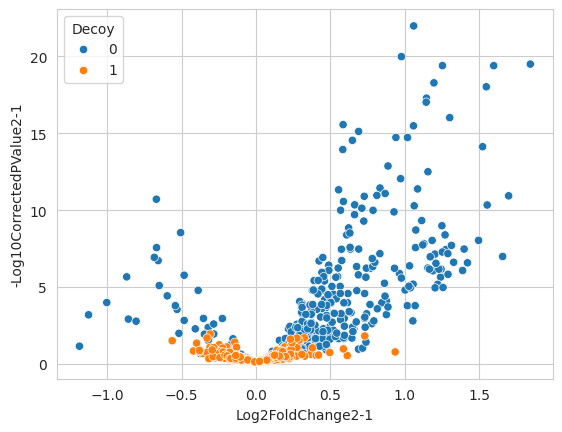

In [16]:
import seaborn as sns


sns.scatterplot(
    data=data,
    x="Log2FoldChange2-1",
    y="-Log10CorrectedPValue2-1",
    hue="Decoy"
)

In [17]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(
    max_depth=3,
)

qm_decoys_added = qm_decoys_added.evaluate(
    clf,
    comparisons=[(2, 1)],
    method="ml"
)

clf = HistGradientBoostingClassifier(
    max_depth=3,
)


qm_decoys_added = qm_decoys_added.evaluate(
    clf,
    comparisons=[(2, 1)],
    method="deg"
)

clf = HistGradientBoostingClassifier(
    max_depth=3,
)


qm_decoys_added = qm_decoys_added.evaluate(
    clf,
    comparisons=[(2, 1)],
    method="all"
)

In [18]:
qm_decoys_added = qm_decoys_added.annotate()

In [19]:
qm_decoys_added.row_annotations

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,...,-Log10CorrectedPValue2-1,MeanImportance2-1,MeanRank2-1,MlFeatureScore2-1,MlFeatureQValue2-1,DegFeatureScore2-1,DegFeatureQValue2-1,AllFeatureScore2-1,AllFeatureQValue2-1,Gene
0,P08603,0,0.018481,25.702930,25.733270,0.397006,0.432812,-0.030340,0.618039,123,...,0.240730,0.150691,586.4,-0.821350,0.378729,-0.362084,0.156977,-1.552262,0.305405,CFH
1,P02671,0,0.037551,29.490347,29.424444,0.615070,0.795177,0.065902,0.518053,123,...,0.276298,0.143757,617.3,-0.342644,0.308307,-0.378003,0.157996,-1.083655,0.221870,FGA
2,P01042,0,0.023464,25.622400,25.583334,0.435524,0.484683,0.039066,0.561823,123,...,0.261009,0.162527,598.1,-1.154872,0.458458,-0.533059,0.178700,-1.448163,0.286115,KNG1
3,P00450,0,0.069428,26.835505,26.728021,0.426089,0.511117,0.107484,0.115588,123,...,0.694578,0.140460,618.1,-0.342644,0.308800,1.464270,0.049133,0.483904,0.062921,CP
4,P05156,0,0.074842,23.281418,23.157433,0.631588,0.494956,0.123985,0.152697,123,...,0.608617,0.037618,961.5,2.877830,0.034091,-0.180295,0.131959,1.846558,0.022039,CFI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,decoy_P07333,1,0.013394,19.332377,19.308489,0.714906,0.740345,0.023888,0.823805,123,...,0.177425,0.085832,779.5,-0.077949,0.275992,-1.605125,0.377108,-2.124179,0.424437,decoy_P07333
1104,decoy_Q06323,1,0.062462,18.301635,18.407716,0.643692,0.579719,-0.106081,0.248984,123,...,0.461161,0.163588,569.8,-0.681147,0.353186,-3.218203,0.496798,-3.247778,0.492166,decoy_Q06323
1105,decoy_P16035,1,0.079668,18.396142,18.532025,0.701996,0.637893,-0.135883,0.177270,123,...,0.560924,0.213135,527.9,-1.062668,0.443051,-2.688020,0.484360,-2.263914,0.440748,decoy_P16035
1106,decoy_O95633,1,0.089920,17.470955,17.313528,0.856852,0.775616,0.157428,0.199647,123,...,0.519281,0.147229,621.8,-0.067200,0.263261,-0.962883,0.265244,-1.460820,0.288703,decoy_O95633


<Axes: xlabel='AllFeatureScore2-1', ylabel='Count'>

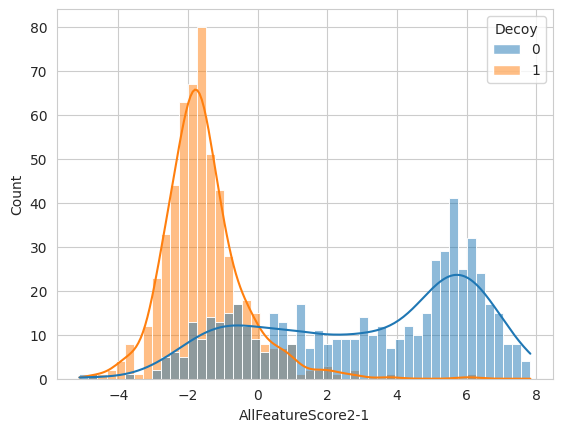

In [20]:
sns.histplot(
    data=qm_decoys_added.row_annotations,
    x="AllFeatureScore2-1",
    hue="Decoy",
    bins=50,
    kde=True
)

<Axes: xlabel='DegFeatureScore2-1', ylabel='Count'>

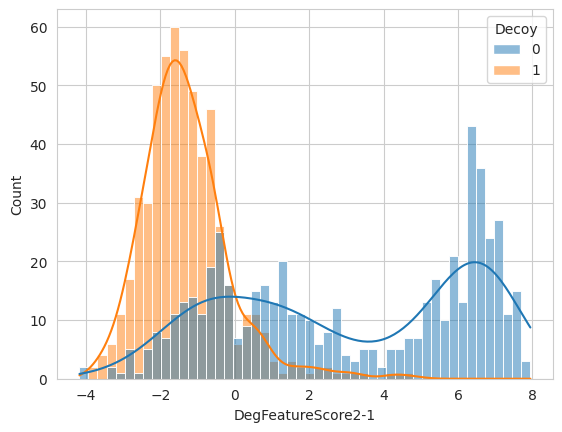

In [21]:
sns.histplot(
    data=qm_decoys_added.row_annotations,
    x="DegFeatureScore2-1",
    hue="Decoy",
    bins=50,
    kde=True
)


<Axes: xlabel='MlFeatureScore2-1', ylabel='Count'>

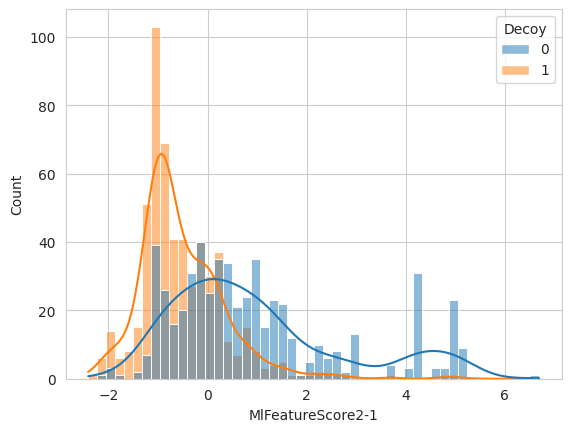

In [22]:
sns.histplot(
    data=qm_decoys_added.row_annotations,
    x="MlFeatureScore2-1",
    hue="Decoy",
    bins=50,
    kde=True
)

In [23]:
qm_decoys_added.row_annotations[qm_decoys_added.row_annotations['MlFeatureQValue2-1'] < 0.01].sort_values(
    "MlFeatureScore2-1", ascending = False
)

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,...,-Log10CorrectedPValue2-1,MeanImportance2-1,MeanRank2-1,MlFeatureScore2-1,MlFeatureQValue2-1,DegFeatureScore2-1,DegFeatureQValue2-1,AllFeatureScore2-1,AllFeatureQValue2-1,Gene
85,Q9Y6R7,0,0.740043,21.958590,20.845263,0.934890,1.242766,1.113327,2.324617e-11,123,...,9.321623,0.496841,81.2,6.690727,0.0,6.612058,0.000000,5.892889,0.008130,FCGBP
234,P13611,0,1.045516,20.256379,19.060833,0.860840,0.554742,1.195546,4.068965e-21,123,...,18.265577,0.704051,16.5,5.087023,0.0,6.661184,0.000000,6.326425,0.000000,VCAN
314,P12111,0,0.666757,18.647786,17.835543,0.725729,0.666394,0.812242,3.607431e-13,123,...,10.954685,0.618417,46.2,5.087023,0.0,7.545900,0.000000,7.322864,0.000000,COL6A3
280,Q9BYE9,0,0.579441,18.737893,18.013538,0.646335,0.762147,0.724354,2.578607e-11,123,...,9.287585,0.568875,47.4,5.087023,0.0,7.541020,0.000000,7.279704,0.000000,CDHR2
257,Q06141,0,0.155107,19.259174,19.531729,0.907635,1.150334,-0.272555,6.836193e-02,123,...,0.865240,0.881621,8.4,5.087023,0.0,-1.996839,0.433298,0.473265,0.062780,REG3A
338,Q06033,0,0.597856,23.621484,23.066376,0.476985,0.463541,0.555108,1.437569e-13,123,...,11.319493,0.703948,18.3,5.087023,0.0,7.507834,0.000000,7.152047,0.000000,ITIH3
329,P55058,0,0.785451,21.326890,20.241003,0.819699,1.065939,1.085887,1.206840e-13,123,...,11.376988,0.662232,21.5,5.087023,0.0,7.299283,0.000000,6.706224,0.000000,PLTP
231,P59665,0,1.332764,23.165443,21.322102,1.244589,0.869829,1.843341,1.236229e-22,123,...,19.481932,0.671215,21.7,5.087023,0.0,6.812247,0.000000,5.916600,0.008333,DEFA1
209,P08519,0,0.629580,20.935940,22.060619,1.759971,2.242976,-1.124679,1.376862e-04,123,...,3.201058,0.703931,19.0,5.087023,0.0,5.851161,0.000000,6.316327,0.000000,LPA
190,P15291,0,0.993302,18.776646,17.631399,0.786283,0.701534,1.145247,5.356134e-20,123,...,17.271149,0.633563,31.4,5.087023,0.0,7.154346,0.000000,6.929851,0.000000,B4GALT1


In [24]:
qm_decoys_added.row_annotations[qm_decoys_added.row_annotations['DegFeatureQValue2-1'] < 0.01].sort_values(
    "DegFeatureScore2-1", ascending = False
)

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,...,-Log10CorrectedPValue2-1,MeanImportance2-1,MeanRank2-1,MlFeatureScore2-1,MlFeatureQValue2-1,DegFeatureScore2-1,DegFeatureQValue2-1,AllFeatureScore2-1,AllFeatureQValue2-1,Gene
197,A6NCN2,0,0.577904,21.948901,21.361293,0.412539,0.663160,0.587608,1.032703e-12,123,...,10.560056,0.393589,144.6,1.032809,0.103004,7.945563,0.000000,5.975066,0.008696,KRT87P
204,P41222,0,0.675755,20.222490,19.295198,0.779942,0.968620,0.927292,6.033261e-12,123,...,9.884560,0.474579,92.2,4.861482,0.054054,7.797232,0.000000,7.403772,0.000000,PTGDS
482,Q562R1,0,0.339362,22.108260,21.539794,0.825655,1.330590,0.568465,3.005666e-04,123,...,2.886141,0.173355,522.7,0.227315,0.201474,7.757937,0.000000,6.989278,0.000000,ACTBL2
89,P00742,0,0.551011,21.968996,21.400246,0.537336,0.493068,0.568750,4.449318e-12,123,...,9.992685,0.593984,35.4,4.241577,0.033898,7.664074,0.000000,5.615207,0.006410,F10
446,Q9UBE0,0,0.403422,18.649542,18.200312,0.515724,0.493512,0.449231,1.013766e-08,123,...,6.923481,0.510973,65.1,4.251567,0.045455,7.586229,0.000000,6.427947,0.000000,SAE1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,P80108,0,0.212318,19.688441,20.035029,0.875679,0.634104,-0.346588,3.528979e-03,123,...,1.941047,0.203287,461.7,0.926702,0.105691,4.417754,0.003984,4.552842,0.003953,GPLD1
547,P08195,0,0.327158,17.652346,17.126274,0.987395,0.727424,0.526073,1.053684e-04,123,...,3.296916,0.095929,760.7,-0.953311,0.410317,4.333556,0.003968,4.729348,0.004082,SLC3A2
166,P62736,0,0.287856,21.940378,21.440256,1.082786,1.285406,0.500121,4.058904e-03,123,...,1.889902,0.102372,736.8,-0.481051,0.321321,4.327601,0.003953,3.750541,0.007067,ACTA2
924,decoy_P01771,1,0.407382,22.921219,22.190107,1.597439,1.944459,0.731112,4.868526e-03,123,...,1.826153,0.407184,164.7,1.722245,0.087591,4.308989,0.007874,2.783756,0.009174,decoy_P01771


In [25]:
qm_decoys_added.row_annotations[qm_decoys_added.row_annotations['AllFeatureQValue2-1'] < 0.01].sort_values(
    "AllFeatureScore2-1", ascending=False
)

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,...,-Log10CorrectedPValue2-1,MeanImportance2-1,MeanRank2-1,MlFeatureScore2-1,MlFeatureQValue2-1,DegFeatureScore2-1,DegFeatureQValue2-1,AllFeatureScore2-1,AllFeatureQValue2-1,Gene
293,P02144,0,0.570860,19.225018,18.562557,0.671582,0.515725,0.662462,9.358088e-12,123,...,9.705506,0.559768,52.9,4.003506,0.027027,7.490675,0.000000,7.834028,0.000000,MB
222,P19320,0,0.901979,19.194700,18.136496,0.712154,0.803872,1.058204,5.021622e-18,123,...,15.475247,0.564844,45.8,4.550763,0.048780,7.360551,0.000000,7.784879,0.000000,VCAM1
381,P69891,0,0.173728,18.757485,18.474606,0.509525,0.992992,0.282878,9.442292e-03,123,...,1.593124,0.056553,892.9,2.600942,0.039216,5.634331,0.000000,7.776162,0.000000,HBG1
69,Q14624,0,0.208208,25.831554,25.521678,0.590827,0.666625,0.309876,8.818497e-04,123,...,2.461146,0.211346,457.9,0.650773,0.154839,6.400612,0.000000,7.737264,0.000000,ITIH4
281,P12109,0,0.861564,19.214594,18.196380,0.786602,0.664573,1.018214,3.623383e-17,123,...,14.713887,0.564080,45.6,4.550763,0.050000,7.200883,0.000000,7.569024,0.000000,COL6A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,P00338,0,0.135728,18.779935,18.535913,1.211770,1.249662,0.244022,1.799012e-01,123,...,0.556206,0.046638,938.7,4.901794,0.029412,-0.649496,0.204152,2.857730,0.006173,LDHA
346,P07478,0,0.256815,18.723225,18.276701,1.147124,1.070387,0.446525,7.570229e-03,123,...,1.668050,0.101295,746.2,0.319233,0.177719,2.704658,0.024055,2.844682,0.006154,PRSS2
120,P35520,0,0.118896,18.361074,18.163931,0.640465,0.739214,0.197143,5.109264e-02,123,...,0.959095,0.087557,787.3,-0.107198,0.276438,1.996880,0.037267,2.833221,0.006135,CBS
924,decoy_P01771,1,0.407382,22.921219,22.190107,1.597439,1.944459,0.731112,4.868526e-03,123,...,1.826153,0.407184,164.7,1.722245,0.087591,4.308989,0.007874,2.783756,0.009174,decoy_P01771


<Axes: xlabel='AllFeatureScore2-1', ylabel='DegFeatureScore2-1'>

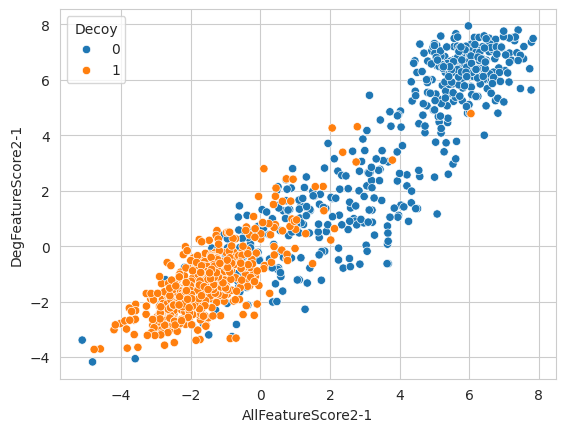

In [26]:
sns.scatterplot(
    data=qm_decoys_added.row_annotations,
    x="AllFeatureScore2-1",
    y="DegFeatureScore2-1",
    hue="Decoy",
)

<Axes: xlabel='AllFeatureScore2-1', ylabel='MlFeatureScore2-1'>

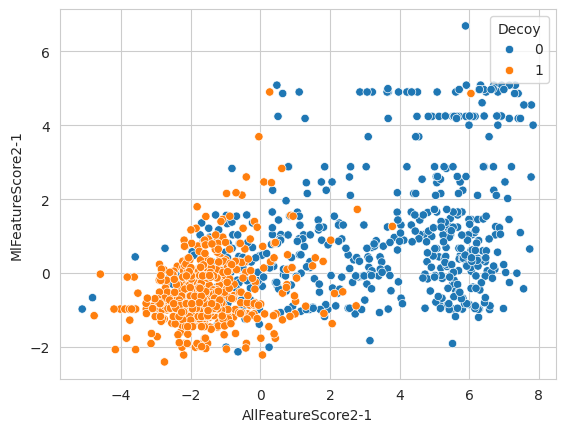

In [27]:
sns.scatterplot(
    data=qm_decoys_added.row_annotations,
    x="AllFeatureScore2-1",
    y="MlFeatureScore2-1",
    hue="Decoy",
)

<Axes: xlabel='DegFeatureScore2-1', ylabel='MlFeatureScore2-1'>

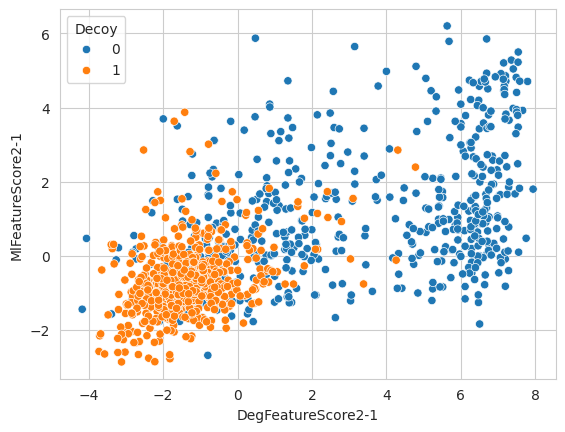

In [28]:
sns.scatterplot(
    data=qm_decoys_added.row_annotations,
    x="DegFeatureScore2-1",
    y="MlFeatureScore2-1",
    hue="Decoy",
)